In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/pm25_pm10_merged.csv')
df

,Date,City,Longitude,Latitude,PM2.5 (µg/m³),PM10 (µg/m³)
0,2015-01-01,Seoul,126.9780,37.5665,0.0,0.0
1,2015-01-01,Tokyo,139.6917,35.6895,0.0,0.0
2,2015-01-01,Beijing,116.4074,39.9042,0.0,0.0
3,2015-01-01,Delhi,77.1025,28.7041,0.0,0.0
4,2015-01-01,Bangkok,100.5018,13.7563,0.0,0.0
...,...,...,...,...,...,...
18570,2025-03-10,Seoul,126.9780,37.5665,0.0,0.0
18571,2025-03-10,Tokyo,139.6917,35.6895,0.0,0.0
18572,2025-03-10,Beijing,116.4074,39.9042,0.0,0.0
18573,2025-03-10,Delhi,77.1025,28.7041,0.0,0.0


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 데이터 로드
data = pd.read_csv("./data/pm25_pm10_merged.csv")  # 파일로 저장 후 로드 가정
data['Date'] = pd.to_datetime(data['Date'])

# 피벗 테이블 생성 (PM2.5)
pivot_data = data.pivot(index='Date', columns='City', values='PM2.5 (µg/m³)').reset_index()
pivot_data = pivot_data.fillna(0)  # 혹시 결측값이 있으면 0으로 채움

Correlation Matrix (with zeros):
City      Beijing     Seoul     Tokyo     Delhi   Bangkok
City                                                     
Beijing  1.000000  0.696379  0.485413  0.731261  0.476041
Seoul    0.696379  1.000000  0.450368  0.669119  0.251459
Tokyo    0.485413  0.450368  1.000000  0.445281  0.327660
Delhi    0.731261  0.669119  0.445281  1.000000  0.439126
Bangkok  0.476041  0.251459  0.327660  0.439126  1.000000


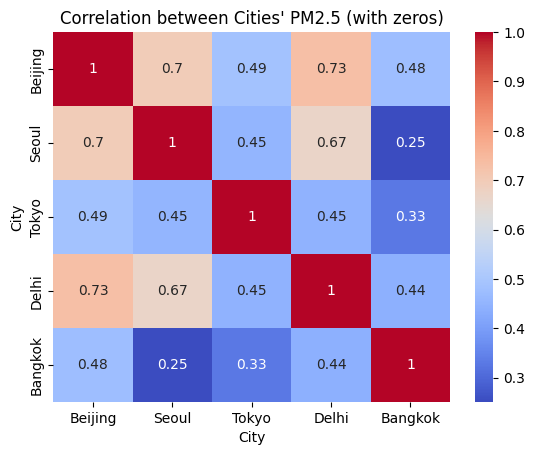

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬 계산
correlation = pivot_data[['Beijing', 'Seoul', 'Tokyo', 'Delhi', 'Bangkok']].corr()
print("Correlation Matrix (with zeros):")
print(correlation)

# 시각화
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between Cities' PM2.5 (with zeros)")
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 독립 변수(X)와 종속 변수(y) 설정
X = pivot_data[['Beijing']]  # 베이징 PM2.5
y = pivot_data[['Seoul', 'Tokyo', 'Delhi', 'Bangkok']]  # 다른 도시 PM2.5

# 데이터 분할 (훈련/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error for each city (Seoul, Tokyo, Delhi, Bangkok):", mse)

Mean Squared Error for each city (Seoul, Tokyo, Delhi, Bangkok): [1502.76975962  150.2671935  5392.8436834  1603.63114938]


In [6]:
def predict_pm25(beijing_pm25):
    input_value = [[beijing_pm25]]
    predicted_pm25 = model.predict(input_value)
    cities = ['Seoul', 'Tokyo', 'Delhi', 'Bangkok']
    return dict(zip(cities, predicted_pm25[0]))

# 예시: 베이징 PM2.5 = 100 µg/m³
result = predict_pm25(100)
print("Predicted PM2.5 for other cities when Beijing PM2.5 = 100 µg/m³:")
for city, value in result.items():
    print(f"{city}: {value:.2f} µg/m³")

Predicted PM2.5 for other cities when Beijing PM2.5 = 100 µg/m³:
Seoul: 49.06 µg/m³
Tokyo: 18.55 µg/m³
Delhi: 106.75 µg/m³
Bangkok: 36.06 µg/m³


/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_4583/2459457226.py:44: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_4583/2459457226.py:44: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_4583/2459457226.py:44: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_4583/2459457226.py:44: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_4583/2459457226.py:44: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_4583/2459457226.py:44: UserWarnin

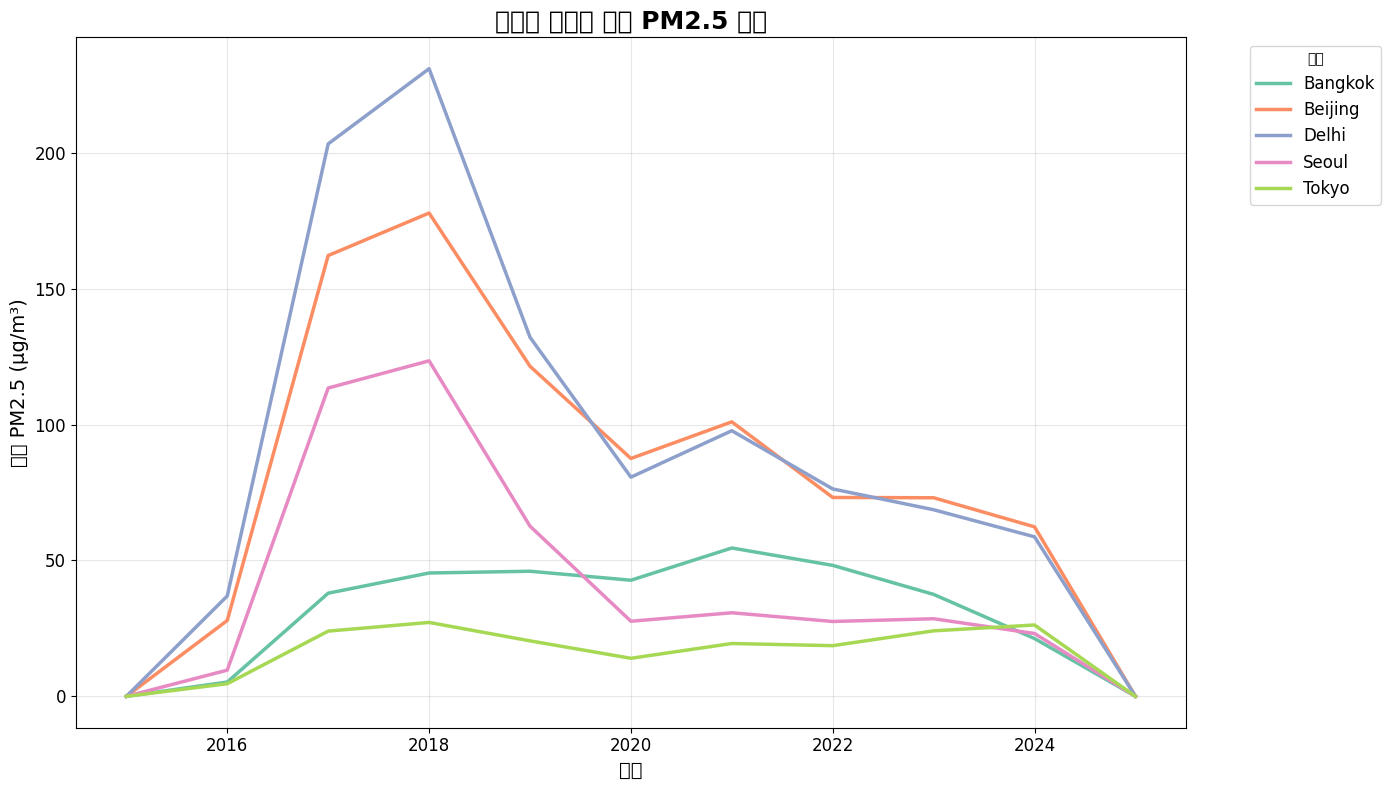

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib

# font_path = 'C:\Windows\Fonts\gulim.ttc'
# font = fm.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family=font)

# CSV 파일 읽기
data = pd.read_csv('./data/pm25_pm10_merged.csv')


# 날짜를 datetime 형식으로 변환 및 연도 추출
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# 도시별 연도별 PM2.5 평균 계산
year_city_avg = data.groupby(['Year', 'City'], as_index=False)['PM2.5 (µg/m³)'].mean()

# 그래프 그리기
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Year', 
    y='PM2.5 (µg/m³)', 
    hue='City', 
    data=year_city_avg, 
    palette='Set2', 
    linewidth=2.5
)

# 그래프 설정
plt.title('도시별 연도별 평균 PM2.5 농도', fontsize=18, fontweight='bold')
plt.xlabel('연도', fontsize=14)
plt.ylabel('평균 PM2.5 (µg/m³)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='도시', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(alpha=0.3)

# 그래프 저장 및 출력
plt.tight_layout()
plt.show()
